In [39]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [40]:
file_name = 'WhatsApp Chat with only Lo-h-re allowed.txt'

In [41]:
import re
import csv

data = []
with open(file_name, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for line in lines:
    parts = re.split(r', ', line.strip(), maxsplit=1)

    
    if len(parts) > 1:
        date = parts[0]
        time_message = parts[1]
        
        time_message_parts = time_message.split(' - ')
        if len(time_message_parts) > 1:
            time = time_message_parts[0]
            message = time_message_parts[1]
        else:
            time = "System"  # Assign a default sender for system messages
            message = time_message_parts[0]
            
        if ':' in message:
            author, message = message.split(':', 1)
            author = author.strip()  # Set author
            message = message.strip()  # Set message
        else:
            author = "WhatsApp"  # Set default author as WhatsApp
            message = message.strip()  # Set message
        
        
        data.append([date, time,author,message])


with open('chat.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Time', 'Author', 'Message'])  # Write header
    writer.writerows(data)


In [42]:
df = pd.read_csv('chat.csv')
df

,Date,Time,Author,Message
0,11/04/22,11:53 am,WhatsApp,Messages and calls are end-to-end encrypted. N...
1,11/04/22,11:53 am,WhatsApp,"Kanishk Pratap Singh created group ""GIT Murdab..."
2,11/04/22,11:53 am,WhatsApp,Kanishk Pratap Singh added you
3,11/04/22,11:53 am,WhatsApp,Kanishk Pratap Singh changed this group's icon
4,11/04/22,11:53 am,Kanishk Pratap Singh,<Media omitted>
...,...,...,...,...
3875,24/08/23,8:49 pm,@Hemant Soni,ok
3876,28/08/23,1:21 pm,Kanishk Pratap Singh,<Media omitted>
3877,28/08/23,1:23 pm,@Hemant Soni,Worst case
3878,Tell me about yourself and tell me about your ...,System,WhatsApp,"family, background"


In [43]:
message_from_whatsapp = df[df["Author"]=='WhatsApp'].shape[0]
print(message_from_whatsapp)

40


In [44]:
df = df[(df['Time'] != 'System') & (df['Date'].str.match(r'\d{2}/\d{2}/\d{2}'))]
df.drop(df[df.Author == 'WhatsApp'].index , inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8928\4126899636.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df

,Date,Time,Author,Message
4,11/04/22,11:53 am,Kanishk Pratap Singh,<Media omitted>
5,11/04/22,11:54 am,Kanishk Pratap Singh,Us group ko archive maro
6,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
7,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
8,11/04/22,11:55 am,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga
...,...,...,...,...
3874,24/08/23,8:49 pm,Kanishk Pratap Singh,Ha to bol na ki apne to abhi bhi 5k likha hua h
3875,24/08/23,8:49 pm,@Hemant Soni,ok
3876,28/08/23,1:21 pm,Kanishk Pratap Singh,<Media omitted>
3877,28/08/23,1:23 pm,@Hemant Soni,Worst case


In [46]:
df.sample(10)

,Date,Time,Author,Message
446,31/12/22,7:05 pm,@Hemant Soni,Bhaiyo dekho Mane ye game banaya h inn holiday...
1964,30/06/23,7:28 pm,Neeraj Git,teri kitni ho gyi bhai
1217,18/04/23,10:01 pm,Kanishk Pratap Singh,Achaa
2959,29/07/23,10:57 am,@Hemant Soni,isse bhen ko msg he nhi kar sakte kase bheju r...
3128,01/08/23,11:45 pm,@Hemant Soni,bhai sunn mane aabhi 10 dino m phone per 3-4 i...
1210,18/04/23,9:07 pm,@Hemant Soni,Bhai bios m jaker virtualization on karde
182,12/04/22,2:06 am,Naresh,Are pooch rha hu bhen ke lodo
2234,05/07/23,8:34 pm,@Hemant Soni,https://aniwatch.to/
3065,01/08/23,9:12 pm,@Hemant Soni,nhi mile to aapne pass to h but mil gaye to ka...
3874,24/08/23,8:49 pm,Kanishk Pratap Singh,Ha to bol na ki apne to abhi bhi 5k likha hua h


In [47]:
total_message = df.shape[0]
print(total_message)

3837


In [48]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

263


In [49]:
df['Time'] = df['Time'].str.replace('\u202F', ' ')
df

C:\Users\user\AppData\Local\Temp\ipykernel_8928\4179420646.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Time,Author,Message
4,11/04/22,11:53 am,Kanishk Pratap Singh,<Media omitted>
5,11/04/22,11:54 am,Kanishk Pratap Singh,Us group ko archive maro
6,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
7,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
8,11/04/22,11:55 am,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga
...,...,...,...,...
3874,24/08/23,8:49 pm,Kanishk Pratap Singh,Ha to bol na ki apne to abhi bhi 5k likha hua h
3875,24/08/23,8:49 pm,@Hemant Soni,ok
3876,28/08/23,1:21 pm,Kanishk Pratap Singh,<Media omitted>
3877,28/08/23,1:23 pm,@Hemant Soni,Worst case


In [50]:
print(df['Message'].apply(type).value_counts())

<class 'str'>      3834
<class 'float'>       3
Name: Message, dtype: int64


In [51]:
df = df[df['Message'].apply(lambda x: isinstance(x, str))]
df

,Date,Time,Author,Message
4,11/04/22,11:53 am,Kanishk Pratap Singh,<Media omitted>
5,11/04/22,11:54 am,Kanishk Pratap Singh,Us group ko archive maro
6,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
7,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>
8,11/04/22,11:55 am,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga
...,...,...,...,...
3874,24/08/23,8:49 pm,Kanishk Pratap Singh,Ha to bol na ki apne to abhi bhi 5k likha hua h
3875,24/08/23,8:49 pm,@Hemant Soni,ok
3876,28/08/23,1:21 pm,Kanishk Pratap Singh,<Media omitted>
3877,28/08/23,1:23 pm,@Hemant Soni,Worst case


In [52]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

# Apply the emoji extraction function
df['emoji'] = df["Message"].apply(split_count)

# Calculate total emojis
emojis = sum(df['emoji'].str.len())
print(emojis)

369


C:\Users\user\AppData\Local\Temp\ipykernel_8928\4116907204.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Kanishk and Hemant")
print("Total Messages: ", total_message)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Kanishk and Hemant
Total Messages:  3837
Number of Media Shared:  263
Number of Emojis Shared 369
Number of Links Shared 63


C:\Users\user\AppData\Local\Temp\ipykernel_8928\3884188236.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l=list(df.Author.unique())

for i in range(len(l)):
    if l[i]!='WhatsApp':
        req_df= messages_df[messages_df["Author"] == l[i]]

        print(f'Stats of {l[i]} -')

        print('Messages Sent', req_df.shape[0])

        words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
        print('Average Words per message', words_per_message)

        media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
        print('Media Messages Sent', media)

        emojis = sum(req_df['emoji'].str.len())
        print('Emojis Sent', emojis)

        links = sum(req_df["urlcount"])   
        print('Links Sent', links)
        print("--"*25)
        print('=='*25)
        print('--'*25)

Stats of Kanishk Pratap Singh -
Messages Sent 714
Average Words per message 5.07703081232493
Media Messages Sent 124
Emojis Sent 113
Links Sent 11
--------------------------------------------------
--------------------------------------------------
Stats of Naresh -
Messages Sent 576
Average Words per message 4.817708333333333
Media Messages Sent 18
Emojis Sent 25
Links Sent 0
--------------------------------------------------
--------------------------------------------------
Stats of @Hemant Soni -
Messages Sent 1714
Average Words per message 7.269544924154026
Media Messages Sent 89
Emojis Sent 178
Links Sent 46
--------------------------------------------------
--------------------------------------------------
Stats of Lakshya Lohra -
Messages Sent 185
Average Words per message 5.194594594594594
Media Messages Sent 20
Emojis Sent 49
Links Sent 2
--------------------------------------------------
--------------------------------------------------
Stats of Neeraj Git -
Messages Sent 

In [55]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

[('😂', 93), ('🤣', 89), ('🥲', 31), ('😁', 17), ('🤧', 9), ('🤔', 7), ('🖕', 7), ('😑', 5), ('💯', 5), ('🥹', 4), ('😢', 4), ('🫡', 4), ('🙄', 3), ('😜', 3), ('🙂', 3), ('🎉', 3), ('😒', 3), ('👌', 3), ('😼', 3), ('😅', 3), ('👍', 3), ('💀', 3), ('🤡', 3), ('😥', 3), ('😆', 3), ('😄', 2), ('🤫', 2), ('🥸', 2), ('🔥', 2), ('🎊', 2), ('😶\u200d🌫️', 2), ('😭', 2), ('🌚', 2), ('👨🏽\u200d🦯', 2), ('🤯', 2), ('😔', 2), ('👀', 2), ('👍🏼', 2), ('🙏', 2), ('😈', 2), ('🤦🏼\u200d♂️', 1), ('😌', 1), ('🧐', 1), ('🐒', 1), ('🚮', 1), ('🛐', 1), ('👍🏻', 1), ('🪔', 1), ('🤓', 1), ('🤦🏻\u200d♂️', 1), ('📌', 1), ('😳', 1), ('🤩', 1), ('😖', 1), ('🫵', 1), ('\U0001fae8', 1), ('😮', 1), ('🙏🏽', 1), ('😴', 1), ('☝️', 1), ('👺', 1), ('😞', 1), ('🙈', 1), ('🤞', 1), ('🤨', 1)]


In [56]:
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
5,11/04/22,11:54 am,Kanishk Pratap Singh,Us group ko archive maro,[],0,24,5,1
8,11/04/22,11:55 am,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga,[],0,46,12,1
9,11/04/22,12:17 pm,Naresh,Haa re maar do re uss grp ko archive,[],0,36,9,1
10,11/04/22,12:17 pm,Naresh,Yaa fir left krdo,[],0,17,4,1
11,11/04/22,12:18 pm,Naresh,Are yrr bc,[],0,10,3,1
...,...,...,...,...,...,...,...,...,...
3872,24/08/23,7:55 pm,@Hemant Soni,Ok m to ab kar raha hu registration,[],0,35,8,1
3874,24/08/23,8:49 pm,Kanishk Pratap Singh,Ha to bol na ki apne to abhi bhi 5k likha hua h,[],0,47,13,1
3875,24/08/23,8:49 pm,@Hemant Soni,ok,[],0,2,1,1
3877,28/08/23,1:23 pm,@Hemant Soni,Worst case,[],0,10,2,1


There are 109745 words in all the messages.


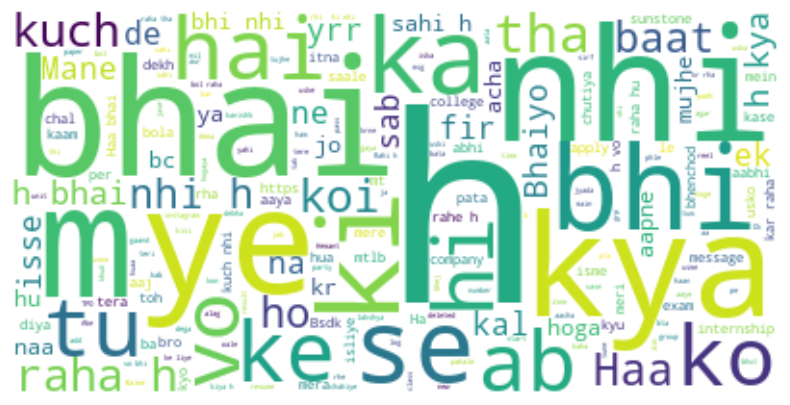

In [57]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

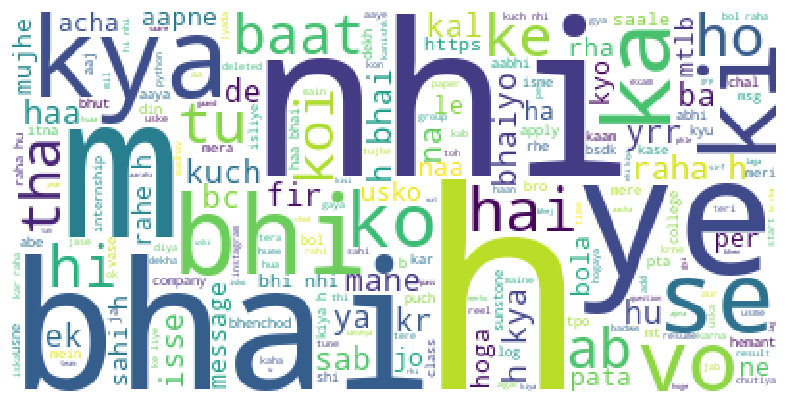

In [58]:
text = " ".join(message.lower() for message in messages_df['Message'])

# Define custom stopwords (add any additional stopwords you want to remove)
custom_stopwords = set(STOPWORDS)
# custom_stopwords.update(["bhai", "ha", "ki", "naa"])  # Add your custom stopwords here

# Remove emojis using regex
text = re.sub(r'(:[^:]*:)', '', text)

# Create a WordCloud with custom settings
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='none')
plt.axis("off")
plt.show()

Author name Kanishk Pratap Singh


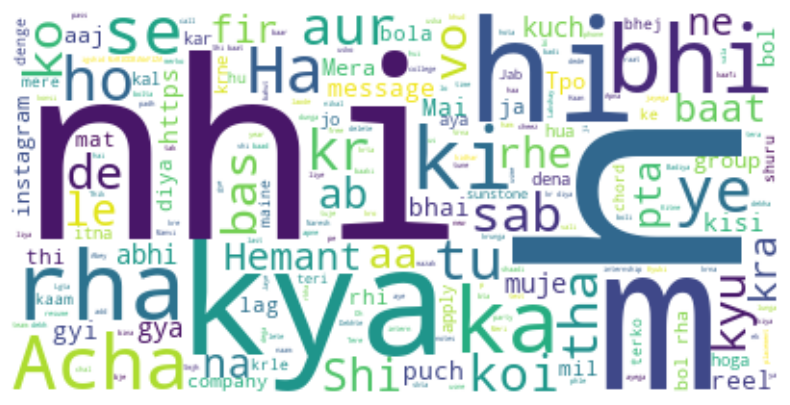

Author name Naresh


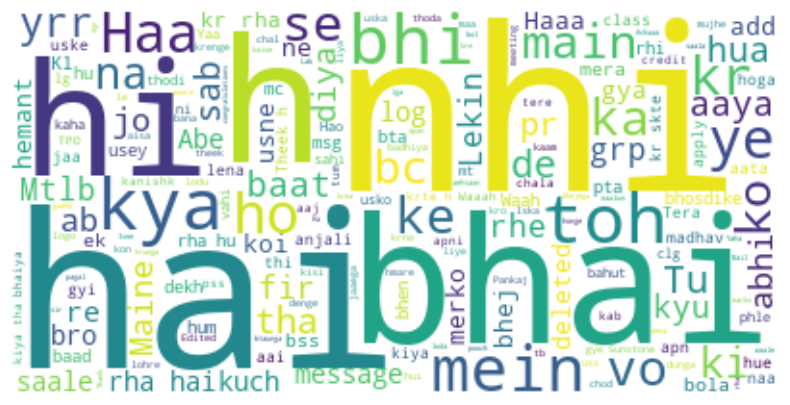

Author name @Hemant Soni


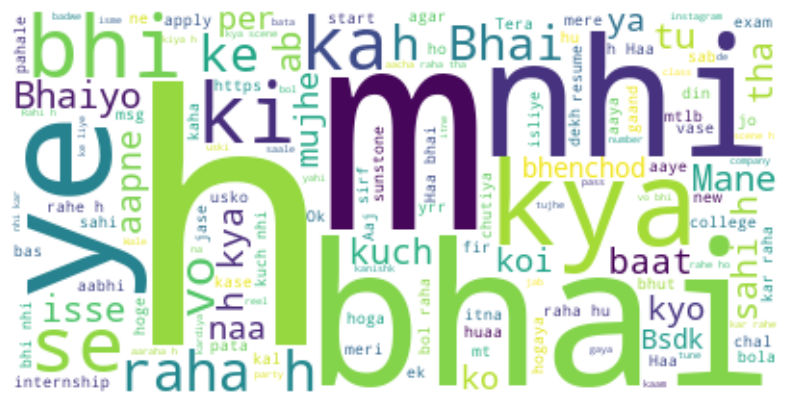

Author name Lakshya Lohra


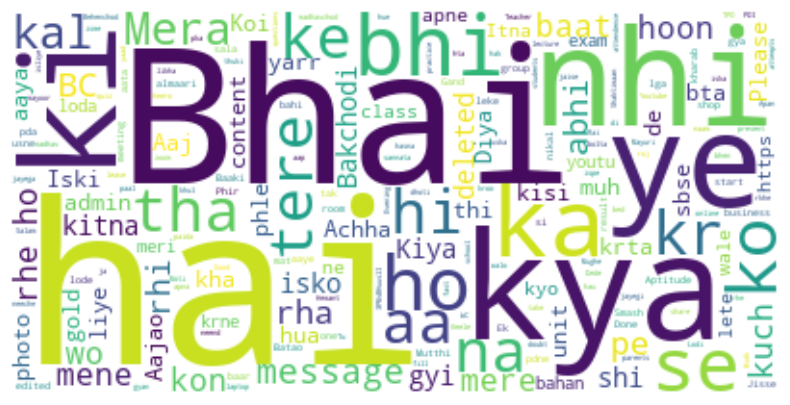

Author name Neeraj Git


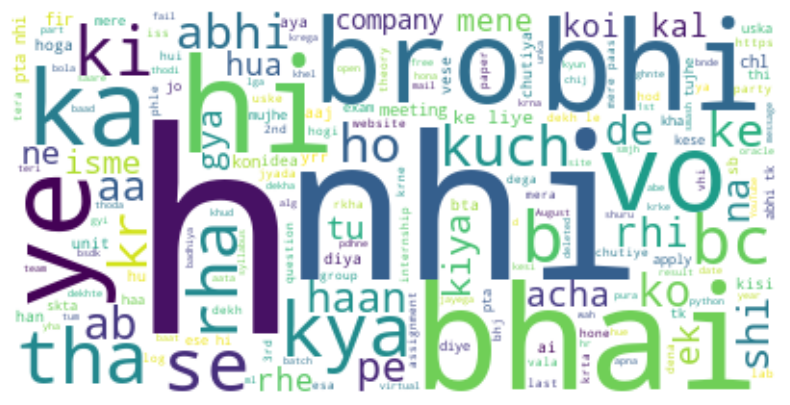

In [59]:
l = list(df.Author.unique())
for i in range(len(l)):
    if l[i]!='WhatsApp':
        dummy_df = messages_df[messages_df['Author'] == l[i]]
        text = " ".join(review for review in dummy_df.Message)
        stopwords = set(STOPWORDS)
        print('Author name',l[i])
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
        plt.figure( figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [60]:
df.head()

,Date,Time,Author,Message,emoji,urlcount
4,11/04/22,11:53 am,Kanishk Pratap Singh,<Media omitted>,[],0
5,11/04/22,11:54 am,Kanishk Pratap Singh,Us group ko archive maro,[],0
6,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>,[],0
7,11/04/22,11:55 am,Kanishk Pratap Singh,<Media omitted>,[],0
8,11/04/22,11:55 am,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga,[],0


In [61]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')
df['Date'] = df['Date'].dt.date

C:\Users\user\AppData\Local\Temp\ipykernel_8928\3445134947.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8928\3445134947.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8928\3445134947.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [62]:
month_year_group = df.groupby(['Month_Year','Message'])
month_year_group.first()

Date  \
Month_Year Message                                                          
2022-04    28 se h kya paper                                   2022-04-11   
           <Media omitted>                                     2022-04-11   
           @919001249294 bhai yrr ladai mt kiya kar            2022-04-11   
           @919001249294 le bhai dekhle madhav bhej raha h...  2022-04-11   
           Aacha h aacha h                                     2022-04-11   
...                                                                   ...   
2023-08    😅                                                   2023-08-01   
           😆😆😆                                                 2023-08-17   
           🙈                                                   2023-08-01   
           🤞                                                   2023-08-06   
           🥲                                                   2023-08-03   

                                                                   Time  \
Month_Year Message                                                        
2022-04    28 se h kya paper                                    3:40 pm   
           <Media omitted>                                     11:53 am   
           @919001249294 bhai yrr ladai mt kiya kar             9:30 pm   
           @919001249294 le bhai dekhle madhav bhej raha h...  10:26 pm   
           Aacha h aacha h                                     12:33 pm   
...                                                                 ...   
2023-08    😅                                                    9:33 pm   
           😆😆😆                                                 11:48 am   
           🙈                                                    9:33 pm   
           🤞                                                    8:23 pm   
           🥲                                                    3:51 pm   

                                                                             Author  \
Month_Year Message                                                                    
2022-04    28 se h kya paper                                                 Naresh   
           <Media omitted>                                     Kanishk Pratap Singh   
           @919001249294 bhai yrr ladai mt kiya kar                    @Hemant Soni   
           @919001249294 le bhai dekhle madhav bhej raha h...          @Hemant Soni   
           Aacha h aacha h                                             @Hemant Soni   
...                                                                             ...   
2023-08    😅                                                                 Naresh   
           😆😆😆                                                 Kanishk Pratap Singh   
           🙈                                                                 Naresh   
           🤞                                                          Lakshya Lohra   
           🥲                                                           @Hemant Soni   

                                                                   emoji  \
Month_Year Message                                                         
2022-04    28 se h kya paper                                          []   
           <Media omitted>                                            []   
           @919001249294 bhai yrr ladai mt kiya kar                   []   
           @919001249294 le bhai dekhle madhav bhej raha h...         []   
           Aacha h aacha h                                            []   
...                                                                  ...   
2023-08    😅                                                         [😅]   
           😆😆😆                                                 [😆, 😆, 😆]   
           🙈                                                         [🙈]   
           🤞                                                         [🤞]   
           🥲                                   

In [63]:
monthly_message_counts = df.groupby(['Month_Year', 'Author']).size().unstack().fillna(0)
monthly_message_counts_long = monthly_message_counts.reset_index().melt(id_vars='Month_Year', var_name='Author', value_name='Number of Messages')

# Create a bar plot using Plotly
fig = px.bar(monthly_message_counts_long, x='Month_Year', y='Number of Messages', color='Author',
             title='Chat Timeline By Month', labels={'Month_Year': 'Month-Year', 'Number of Messages': 'Number of Messages'},
             hover_data={'Month_Year': False, 'Author': True, 'Number of Messages': True})

# Customize the x-axis tick angle and labels
fig.update_xaxes(tickangle=-45, tickmode='array', tickvals=monthly_message_counts_long['Month_Year'], ticktext=monthly_message_counts_long['Month_Year'])

# Show the plot
fig.show()

In [64]:
df.Time

4       11:53 am
5       11:54 am
6       11:55 am
7       11:55 am
8       11:55 am
          ...   
3874     8:49 pm
3875     8:49 pm
3876     1:21 pm
3877     1:23 pm
3879     1:23 pm
Name: Time, Length: 3834, dtype: object

In [65]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# Extract hour from Time column
df['Hour'] = df['Time'].dt.hour

# Categorize time as AM or PM
df['AMPM'] = df['Time'].dt.strftime('%p')

# Group data by Hour, AMPM, and Author and count messages
hourly_message_counts = df.groupby(['Hour', 'AMPM', 'Author']).size().unstack().fillna(0)

# Filter out rows with no messages
hourly_message_counts = hourly_message_counts[hourly_message_counts.sum(axis=1) > 0]

hourly_message_counts_long = hourly_message_counts.reset_index().melt(id_vars=['Hour', 'AMPM'], var_name='Author', value_name='Number of Messages')

# Create a bar plot using Plotly
fig = px.bar(hourly_message_counts_long, x='Hour', y='Number of Messages', color='Author',
             title='Author Activity by Time of Day', labels={'Hour': 'Time of Day (12-Hour)', 'Number of Messages': 'Number of Messages'},
             hover_data={'Hour': False, 'AMPM': False, 'Author': True, 'Number of Messages': True},
          )  # Add 'Hour' to the text parameter

# Format x-axis tick labels
hour_labels = [f"{hour % 12}{'AM' if hour < 12 else 'PM'}" for hour in range(24)]
fig.update_xaxes(tickmode='array', tickvals=list(range(24)), ticktext=hour_labels)

# Customize the x-axis tick angle and labels
fig.update_xaxes(tickangle=-45)

# Customize the layout
fig.update_layout(showlegend=True, legend=dict(orientation="v", x=1.0, y=1.05))
fig.update_traces(marker_line_width=1)

# Customize the hover template to display time, author, and number of messages
hover_template = '%{x}<br>@%{customdata[1]} : %{y}'
fig.update_traces( textfont=dict(family='Arial', size=12, color='black'), 
                  hovertemplate=hover_template)

# Show the plot
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8928\2620867661.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8928\2620867661.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8928\2620867661.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

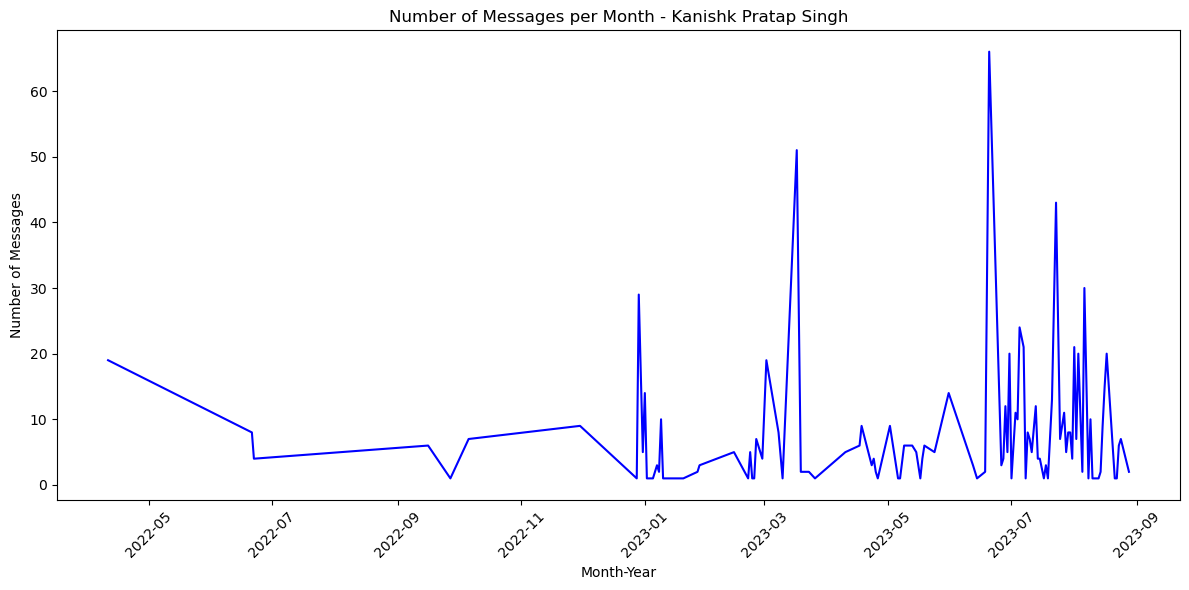

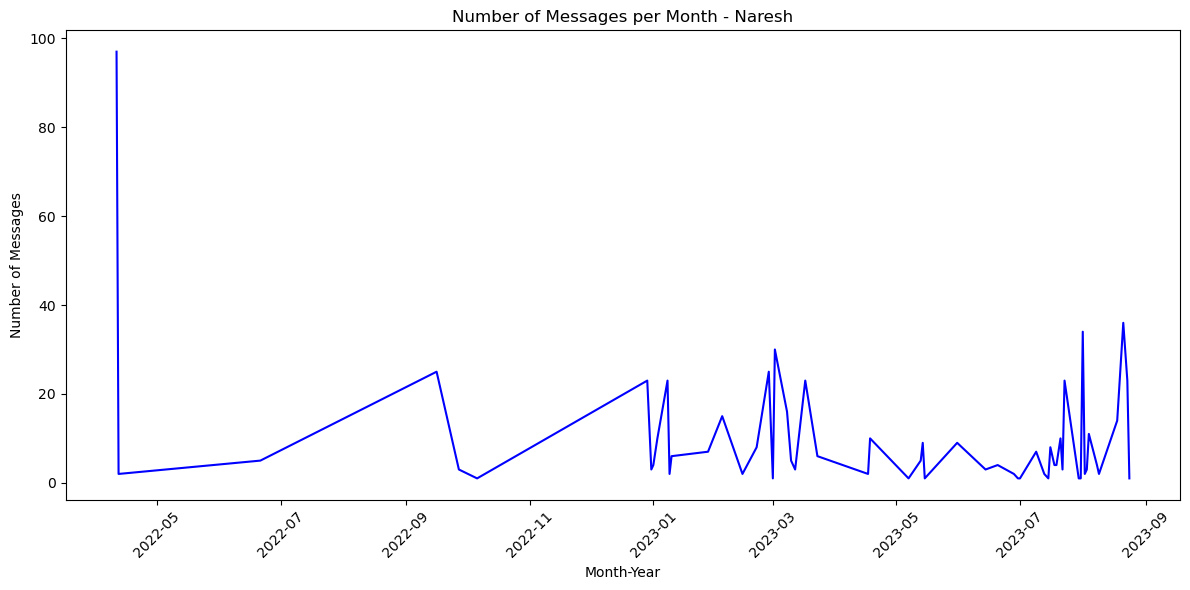

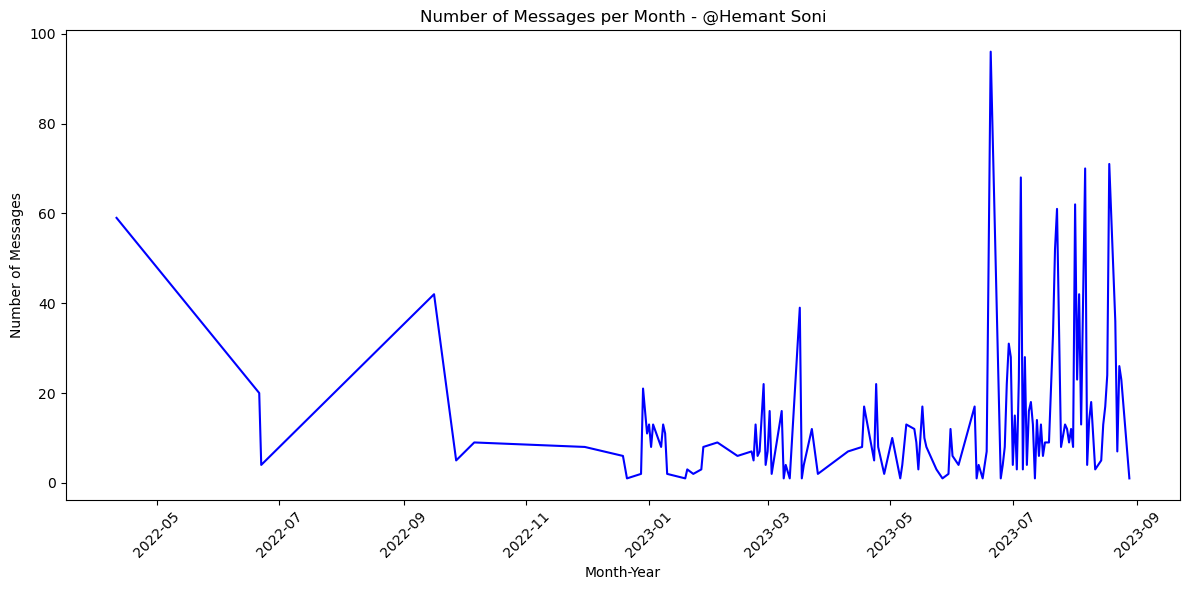

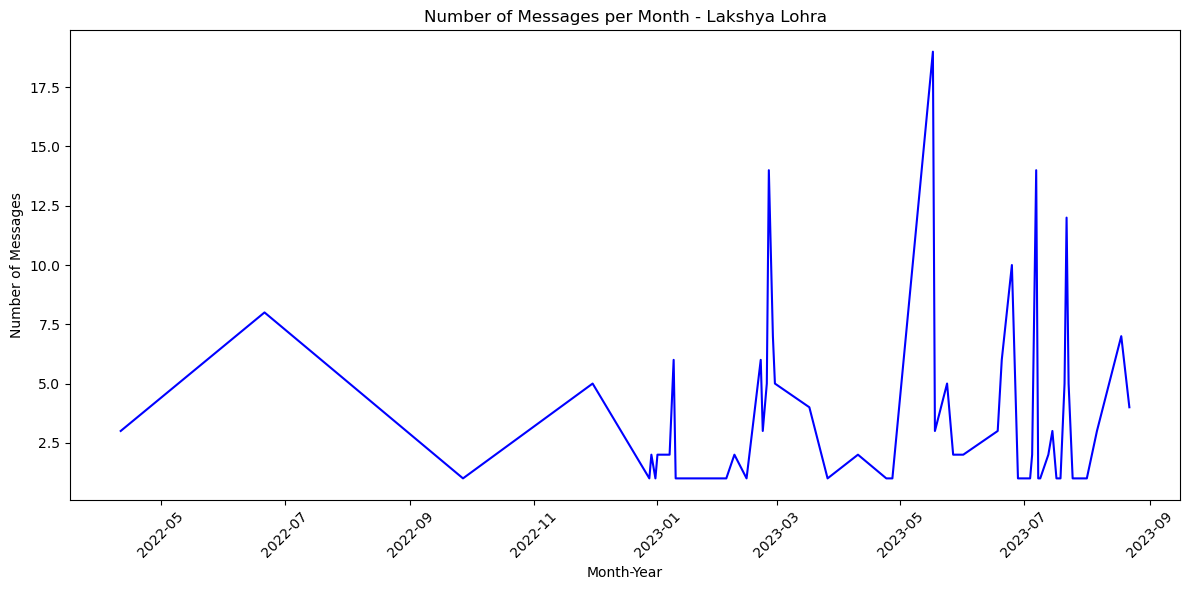

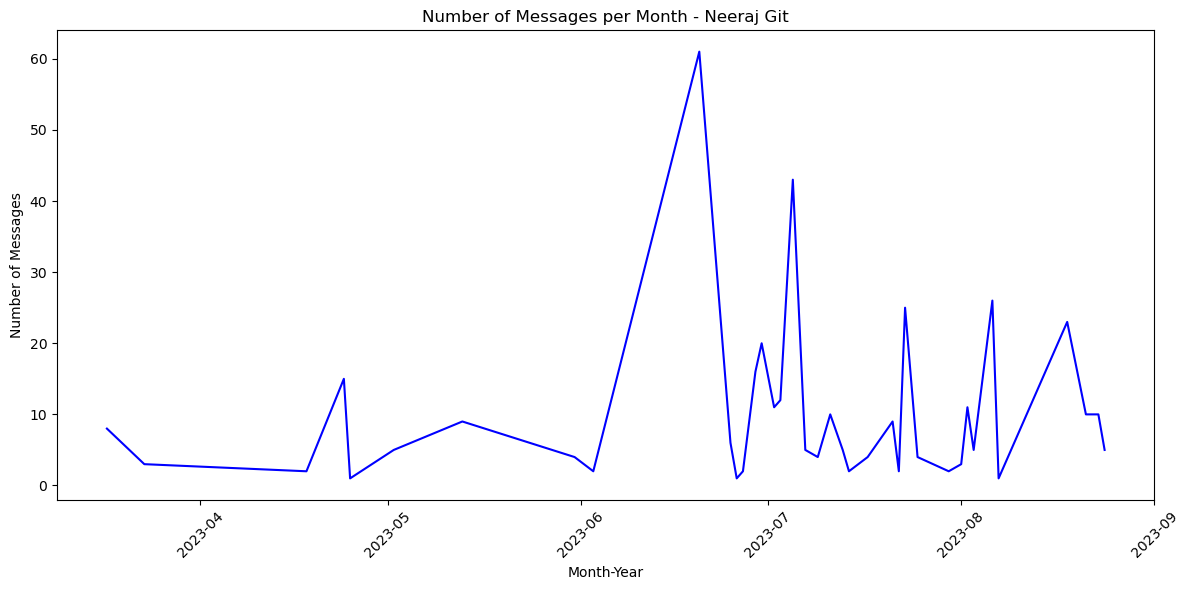

In [66]:
# Create separate bar graphs for each author
unique_authors = df['Author'].unique()
for author in unique_authors:
    if author != 'WhatsApp':
        author_subset = df[df['Author'] == author]
    
    # Group data by Month_Year and count messages
        monthly_message_counts = author_subset.groupby(['Date']).size().sort_index()
        monthly_message_counts
    # Create a new plot for each author
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=monthly_message_counts.index, y=monthly_message_counts.values, color='blue')
    
    # Customize the plot
        plt.title(f'Number of Messages per Month - {author}')
        plt.xlabel('Month-Year')
        plt.ylabel('Number of Messages')
        plt.xticks(rotation=45)
        plt.tight_layout()
    
    # Show the plot
        plt.show()

In [67]:
total_messages_per_author = df.groupby('Author')['Message'].count().reset_index()

# Create a donut chart using Plotly
fig = px.pie(total_messages_per_author, values='Message', names='Author', hole=0.3,
             title='Total Number of Messages per Author')

# Customize hovertemplate to make the appearing message text black
fig.update_traces(hovertemplate='<b>%{label}: <b>%{value}<extra></extra>')

# Show the plot
fig.show()

In [68]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract weekday information (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Group data by weekday, Author, and count messages
weekday_message_counts = df.groupby(['Weekday', 'Author'])['Message'].count().reset_index()

# Define weekday names for the X-axis
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = px.line(weekday_message_counts, x='Weekday', y='Message', color='Author',
              labels={'Weekday': 'Weekday', 'Message': 'Number of Messages', 'Author': 'Author'},
              title='Time Series Line Chart: Number of Messages by Weekday by Authors')

# Set X-axis labels to weekday names
fig.update_xaxes(tickmode='array', tickvals=list(range(7)), ticktext=weekday_names)

# Customize the layout
fig.update_layout(title='Number of Messages by Weekday by Authors',
                  xaxis_title='Weekday',
                  yaxis_title='Number of Messages')

# Show the plot
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8928\2552719538.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_8928\2552719538.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
correct_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set the 'Month' column as categorical with custom ordering
df['Month'] = pd.Categorical(df['Month'], categories=correct_order, ordered=True)

# Group data by month, Author, and count messages
monthly_message_counts = df.groupby(['Month', 'Author'])['Date'].count().reset_index()

fig_bubble = px.scatter(monthly_message_counts, x='Month', y='Author', size='Date', color='Author',
                        labels={'Month': 'Month', 'Date': 'Number of Messages', 'Author': 'Author'},
                        title='Bubble Chart: Number of Messages by Month and Author')

# Show the bubble chart
fig_bubble.show()


In [70]:
df.head()

,Date,Time,Author,Message,emoji,urlcount,Month_Year,Hour,AMPM,Weekday,Month
4,2022-04-11,1900-01-01 11:53:00,Kanishk Pratap Singh,<Media omitted>,[],0,2022-04,11,AM,0,Apr
5,2022-04-11,1900-01-01 11:54:00,Kanishk Pratap Singh,Us group ko archive maro,[],0,2022-04,11,AM,0,Apr
6,2022-04-11,1900-01-01 11:55:00,Kanishk Pratap Singh,<Media omitted>,[],0,2022-04,11,AM,0,Apr
7,2022-04-11,1900-01-01 11:55:00,Kanishk Pratap Singh,<Media omitted>,[],0,2022-04,11,AM,0,Apr
8,2022-04-11,1900-01-01 11:55:00,Kanishk Pratap Singh,Ye last 3 year ke h. Time mila to add kr dunga,[],0,2022-04,11,AM,0,Apr


In [71]:
df = df.sort_values(by='Date')

# Calculate the difference between consecutive dates
df['DateDiff'] = df['Date'].diff()

# Find streaks of consecutive chats (e.g., consecutive chats on consecutive days)
# Create a new streak number whenever there is a gap larger than one day
streak_count = 1
streaks = []

for diff in df['DateDiff'].dt.days:
    if diff == 1:
        streak_count += 1
    else:
        streak_count = 1
    streaks.append(streak_count)

df['Streak'] = streaks

# Calculate Chat Frequency (days per chat) for each user
user_chat_counts = df.groupby('Author')['Date'].count()
user_chat_frequency = (df['Date'].max() - df['Date'].min()).days / user_chat_counts

# Find the longest streak
max_streak = df['Streak'].max()

# Find the dates of the longest streak
longest_streak_dates = df[df['Streak'] == max_streak]['Date']

print(f"Chat Frequency (Days per Chat): {user_chat_frequency}")
print(f"Longest Streak: {max_streak}")
print(f"Start Date of Longest Streak: {longest_streak_dates.iloc[0].strftime('%Y-%m-%d')}")
print(f"End Date of Longest Streak: {(longest_streak_dates.iloc[-1] + timedelta(days=max_streak)).strftime('%Y-%m-%d')}")

Chat Frequency (Days per Chat): Author
@Hemant Soni            0.279534
Kanishk Pratap Singh    0.601432
Lakshya Lohra           2.458537
Naresh                  0.848485
Neeraj Git              1.279188
Name: Date, dtype: float64
Longest Streak: 3
Start Date of Longest Streak: 2023-03-10
End Date of Longest Streak: 2023-08-14


In [72]:
min_date = df['Date'].min()
max_date = df['Date'].max()

date_diff = max_date - min_date
total_years = date_diff.days // 365
total_months = (date_diff.days % 365) // 30
total_days = date_diff.days % 30

print(f"Total Years: {total_years}, Total Months: {total_months}, Total Days: {total_days}")

Total Years: 1, Total Months: 4, Total Days: 24


In [73]:
most_active_day = df.groupby(df['Date'].dt.date)['Author'].count().idxmax()

# Most active month
most_active_month = df.groupby(df['Date'].dt.to_period('M'))['Author'].count().idxmax()

# Most active year
most_active_year = df.groupby(df['Date'].dt.to_period('Y'))['Author'].count().idxmax()

print(f"Most Active Day: {most_active_day}")
print(f"Most Active Month: {most_active_month}")
print(f"Most Active Year: {most_active_year}")

Most Active Day: 2023-06-20
Most Active Month: 2023-07
Most Active Year: 2023


In [74]:
df.Time

4      1900-01-01 11:53:00
118    1900-01-01 21:32:00
119    1900-01-01 21:33:00
120    1900-01-01 21:33:00
121    1900-01-01 21:33:00
               ...        
3855   1900-01-01 19:48:00
3848   1900-01-01 19:41:00
3877   1900-01-01 13:23:00
3876   1900-01-01 13:21:00
3879   1900-01-01 13:23:00
Name: Time, Length: 3834, dtype: datetime64[ns]

In [75]:
all_messages = " ".join(messages_df['Message'])

# Use regular expressions to find URLs
urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', all_messages)

# Remove duplicate URLs and print them
unique_urls = list(set(urls))
print(len(unique_urls))
for url in unique_urls:
    print(url)

63
https://gssoc.girlscript.tech/
https://www.instagram.com/reel/Cuvk5zgA_CU/?igshid=NjZiM2M3MzIxNA==
https://youtu.be/krSNmVwyO-M
https://www.instagram.com/reel/Cvzm2YvAwii/?igshid=MzRlODBiNWFlZA==
https://www.linkedin.com/jobs/view/3660148060
https://aniwatch.to/
https://www.instagram.com/reel/CuhKAluOj7q/?igshid=ZDU2YzJkNzEyMw==
https://www.instagram.com/reel/Cu-GAHchyUM/?igshid=NjZiM2M3MzIxNA==
https://www.linkedin.com/company/culturex/
https://www.instagram.com/reel/CtmD1NDqoqc/?igshid=NjZiM2M3MzIxNA==
https://youtu.be/IfN9F93xr_g
https://youtu.be/PtR0PSTU4i4
https://www.instagram.com/p/CuGjLrXpQYY/?igshid=NjZiM2M3MzIxNA==
https://www.desiqna.in/15209/oracle-mass-hiring-freshers-experienced-developer-sde-ctc
https://dataproinnovations.com/
https://www.linkedin.com/posts/avinash-agrawal-397b0a206_avinash-resume-activity-7088967237595803648-1xaU?utm_source=share&utm_medium=member_desktop
https://www.instagram.com/reel/CvXrCdupCGU/?igshid=MzRlODBiNWFlZA==
https://www.instagram.com/re

In [76]:
longest_message_index = messages_df['Message'].str.len().idxmax()

# Extract the longest message, author, and its length
longest_message = messages_df.loc[longest_message_index, 'Message']
author_of_longest_message = messages_df.loc[longest_message_index, 'Author']
length_of_longest_message = len(longest_message)

# Print the result
print(f"Author of the Longest Message: {author_of_longest_message}")
print(f"Length of the Longest Message: {length_of_longest_message} characters")
print("Longest Message:")
print(longest_message)

Author of the Longest Message: @Hemant Soni
Length of the Longest Message: 479 characters
Longest Message:
https://www.linkedin.com/e/v2?e=-lasvau-lfl3mgtq-a1&lipi=urn%3Ali%3Apage%3Aemail_email_linkedinlearning_activation_em1%3BIwz14peqQGOTUJ6E7unCPA%3D%3D&t=plh&midToken=AQHnuDyHuWSFVQ&ek=email_linkedinlearning_activation_em1&li=0&m=hero&ts=cta_v3&urlhash=LeaP&url=https%3A%2F%2Fwww%2Elinkedin%2Ecom%2Flearning-login%2Fcontinue%3Faccount%3D88982986%26identity%3DABkBAAAAAAVNxcoAAAAADCHuAwAAAYeo-E1uAUvrgArcOHsQfq2Dz2eZfd-dWTrf%26lang%3Den%26itrk%3Dr3q8vLZ%252FRU2EgTTNZyys4Q%253D%253D
